Shape of data: (418, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

Description:
        PassengerId    Survived      Pclass                      Name   Sex  \
count    418.000000  418.000000  418.000000                       418   418   
unique          NaN         NaN    

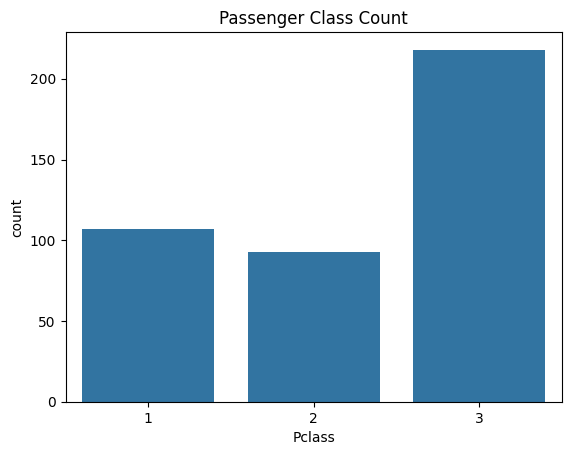


Female passengers who survived:
1                     Wilkes, Mrs. James (Ellen Needs)
4         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
6                                 Connolly, Miss. Kate
8            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
12       Snyder, Mrs. John Pillsbury (Nelle Stevenson)
                            ...                       
409                          Peacock, Miss. Treasteall
410                             Naughton, Miss. Hannah
411    Minahan, Mrs. William Edward (Lillian E Thorpe)
412                     Henriksson, Miss. Jenny Lovisa
414                       Oliva y Ocana, Dona. Fermina
Name: Name, Length: 152, dtype: object

Passengers in 3rd class under 18:
                                          Name    Age  Pclass
5                   Svensson, Mr. Johan Cervin  14.00       3
21                   Olsen, Master. Artur Karl   9.00       3
55                        Rice, Master. Albert  10.00       3
60                             Dika, Mr.

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

df = pd.read_csv('titanic.csv')
print("Shape of data:", df.shape)
print("\nInfo:")
print(df.info())
print("\nDescription:")
print(df.describe(include='all'))
age_imputer = SimpleImputer(strategy='mean')
df['Age'] = age_imputer.fit_transform(df[['Age']])
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Count")
plt.show()
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
print("\nFemale passengers who survived:")
print(female_survivors['Name'])
third_class_under_18 = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print("\nPassengers in 3rd class under 18:")
print(third_class_under_18[['Name', 'Age', 'Pclass']])
class1_over_40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print("\nClass 1 passengers older than 40:")
print(class1_over_40[['Name', 'Age', 'Pclass']])
class1_over_40_survived = class1_over_40[class1_over_40['Survived'] == 1]
print("\nClass 1 passengers older than 40 who survived:")
print(class1_over_40_survived[['Name', 'Age', 'Survived']])
rich_males = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print("\nMale passengers who paid fare > 100:")
print(rich_males[['Name', 'Fare', 'Sex']])
embarked_C_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print("\nPassengers embarked from C and in Class 2:")
print(embarked_C_class2[['Name', 'Embarked', 'Pclass']])
sibsp_gt2 = df[df['SibSp'] > 2]
print("\nPassengers with more than 2 siblings/spouses aboard:")
print(sibsp_gt2[['Name', 'SibSp']])
no_family_no_survive = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print("\nPassengers who did not survive and had no family aboard:")
print(no_family_no_survive[['Name', 'Survived', 'SibSp', 'Parch']])
top5_oldest_survivors = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print("\nTop 5 oldest passengers who survived:")
print(top5_oldest_survivors[['Name', 'Age', 'Survived']])
zero_fare = df[df['Fare'] == 0]
print("\nPassengers who paid zero fare:")
print(zero_fare[['Name', 'Fare']])

X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split completed:")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
